In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import pickle
import os
# PCA 套件
from sklearn.decomposition import PCA

In [3]:
os.getcwd()

'c:\\Users\\Sheng\\Documents\\NTPU_Bachelor\\Year_4\\Y4_Sem_2\\ShallowML\\ClassNote'

In [2]:
path = r'C:\Users\Sheng\Documents\NTPU_Bachelor\Year_4\Y4_Sem_2\ShallowML\ClassData'
data_file = os.path.join(path, 'mnist_digits_784.pkl')
print(data_file)

C:\Users\Sheng\Documents\NTPU_Bachelor\Year_4\Y4_Sem_2\ShallowML\ClassData\mnist_digits_784.pkl


In [3]:
# Check if data file exists
if os.path.isfile(data_file):
    # Load data from file
    with open(data_file, 'rb') as f:
        data = pickle.load(f)
else:
    # Fetch data from internet
    data = fetch_openml('mnist_784', version=1, parser='auto')
    # Save data to file
    with open(data_file, 'wb') as f:
        pickle.dump(data, f)
# Print the keys
print(data.keys())
# Print the shape of the data
print(data.data.shape)
print(data.target.shape)

# description of the data
print(data.DESCR)

# Print the unique labels
print(np.unique(data.target))
# Print the first few data points
display(data.data[:5])
# Extract data and labels
X, y = np.array(data.data).T, np.array(data.target).astype('int')
# Split data into training and test sets
# X_train, X_test = data.data[:60000], data.data[60000:]
# y_train, y_test = data.target[:60000], data.target[60000:]

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
(70000, 784)
(70000,)
**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain 

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### 範例 2. 試著先寫一支小程式秀出矩陣 X 中的一張數字圖，如圖 7，熟悉影像資料的結構。成功之後，再將程式擴大為可以秀出多張數字圖合併的「大圖」（蒙太奇），如圖 6，以便能同時觀察多張樣本影像的異同。

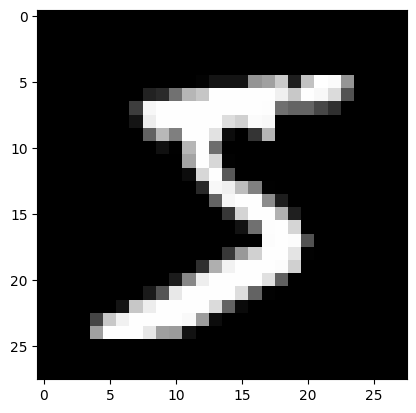

In [4]:
import matplotlib.pyplot as plt
i = 0
img = X[:, i] # 第一列（第一張圖）
sz = np.sqrt(len(img)).astype('int')
plt.imshow(np.array(img).reshape(sz, sz), cmap='Grays_r')
plt.show()

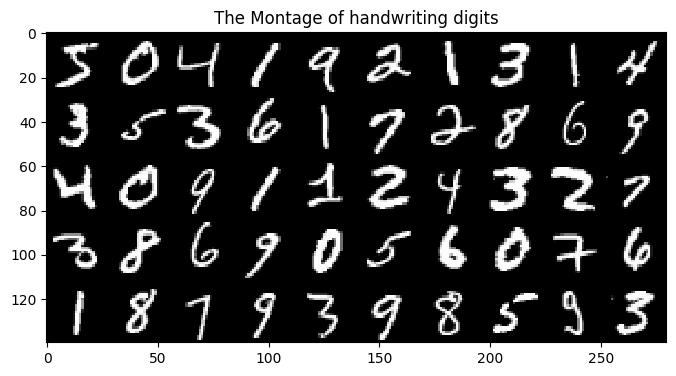

In [6]:
def montage(A, m, n):
    '''
    Create a montage matrix with m x n images
    Inputs:
    A: original pxN image matrix with N images (p pixels), N > mn
    m, n: m rows & n columns, total mn images
    Output:
    M: montage matrix containing mn images
    '''

    sz = np.sqrt(A.shape[0]).astype('int') # image size sz x sz
    M = np.zeros((m*sz, n*sz)) # montage image
    for i in range(m) :
        for j in range(n) :
            M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] = A[:, i*n+j].reshape(sz, sz)

    return M

plt.figure(figsize = (8, 6))
m, n = 5, 10 # m x n montage (total mn images)
M = montage(X, m, n)
plt.imshow(M, cmap = plt.cm.gray, interpolation = 'nearest')
# plt.xticks([])
# plt.yticks([])
plt.title('The Montage of handwriting digits')
plt.show()

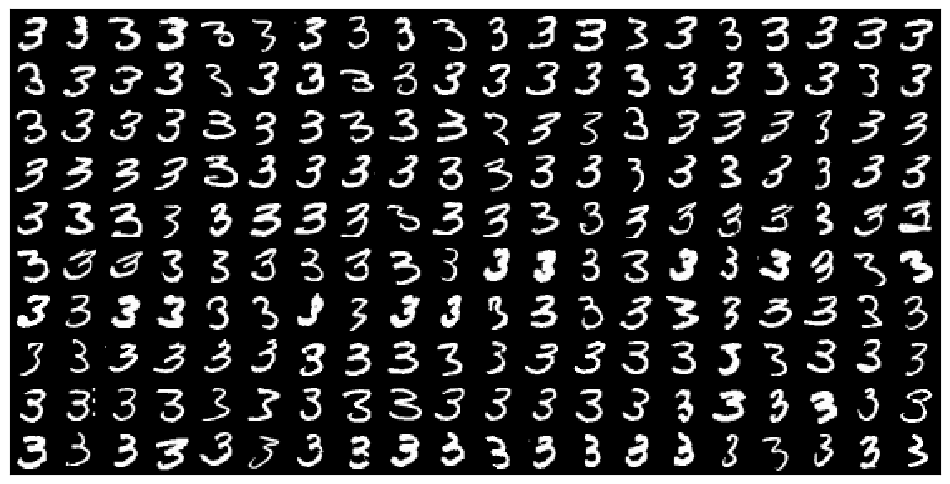

In [7]:
digit_to_show = 3
Digit = X[:, y==digit_to_show]
plt.figure(figsize = (12, 12))
m, n = 10, 20 # A m x n montage (total mn images)
M = montage(Digit, m, n)
plt.imshow(M, cmap = 'gray', interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# 抽出 200 個數字 3 的圖片
digit_to_show = 3
n = 20
Digit_train = X[:, y==digit_to_show][:, :n]

# 進行 SVD 分解
U, S, Vt = np.linalg.svd(Digit_train, full_matrices=False)
# U 形狀: (784, 20), S 形狀: (20,), Vt 形狀: (20, 20)

In [53]:
Digit_svd_16 = Digit_train  # 保留原始矩陣

# 定義不同的 q 值
# q_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
q_values = np.arange(1, 20, 1)

for q in q_values:
    # 保留前 q 個奇異值
    U_q = U[:, :q]  # 取 U 的前 q 列
    S_q = np.diag(S[:q])  # 取前 q 個奇異值，構造對角矩陣
    Vt_q = Vt[:q, :]  # 取 Vt 的前 q 行

    # 重建矩陣
    Digit_svd = U_q @ S_q @ Vt_q  # 使用矩陣乘法重建

    # 收集資料
    Digit_svd_16 = np.hstack([Digit_svd_16, Digit_svd])

# 查看重建後的矩陣形狀
print(Digit_svd_16.shape)  # 應該與原始矩陣形狀相同

(784, 400)


講義裡的圖 9 寫 q 取 1-29，但是 列 只有 20，要怎麼取到 29，還是講義錯了

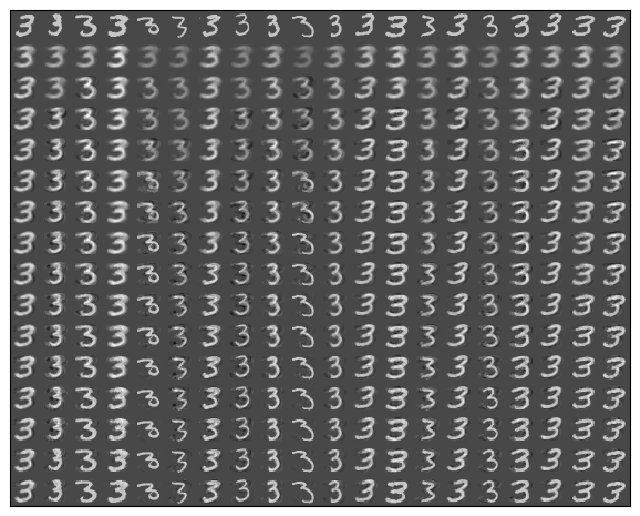

In [54]:
plt.figure(figsize = (8, 8))
m, n = 16, 20 # A m x n montage (total mn images)
M = montage(Digit_svd_16, m, n)
plt.imshow(M, cmap = 'gray', interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
Digit_u_16 = Digit_train  # 保留原始矩陣

# 定義不同的 q 值
# q_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
q_values = np.arange(1, 21, 1)

for q in q_values:
    # 保留前 q 個奇異值
    U_q = U[:, :q]  # 取 U 的前 q 列

    # 重建矩陣
    Digit_svd = U_q @ S_q @ Vt_q  # 使用矩陣乘法重建

    # 收集資料
    Digit_svd_16 = np.hstack([Digit_svd_16, Digit_svd])

# 查看重建後的矩陣形狀
print(Digit_svd_16.shape)  # 應該與原始矩陣形狀相同